<div style="text-align:right"> Kraków 19.11.2022 </div>

## Hackathon with Python 101

![hackyeah](imgs/hackyeah.jpeg)
<div style="text-align:right"> Adrianna Tokarska </div>

![qrcode](imgs/qrcode.png)

### https://github.com/atadria/Hackathon-with-Python-101

## Agenda

0. Teamwork #git
1. Reading and cleaning data #pandas
2. Simple ML models #scikit-learn
3. Data visualization with dashboards #dash

## Virtual environments:  
Some info: https://realpython.com/python-virtual-environments-a-primer/  
How to click in PyCharm: https://www.jetbrains.com/help/pycharm/creating-virtual-environment.html#env-requirements  
Official documentation: https://docs.python.org/3/library/venv.html

## Git 
Interactive course: https://learngitbranching.js.org/  
How to click in PyCharm: https://www.jetbrains.com/help/pycharm/using-git-integration.html  
GitHub get started: https://docs.github.com/en/get-started

## install requirements

`pip install -r requirements.txt`

https://note.nkmk.me/en/python-pip-install-requirements/  

## Dataset 
[kaggle - Twitter Airline Sentiment](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment)

### Some links 
Pandas Cheat Sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Kaggle Pandas Course : https://www.kaggle.com/learn/pandas

In [1]:
import pandas as pd

# Load Data
# more about read_csv - check out sep parameter: 
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
df = pd.read_csv('Tweets.csv')
df.sample(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14334,569631824101683200,negative,1.0000,Flight Booking Problems,0.6612,American,NaN,m0nica,NaN,0,@AmericanAir Where are your tickets offices in...,NaN,2015-02-22 14:56:24 -0800,"Cambridge, MA",Mid-Atlantic
6065,568377318822912000,negative,1.0000,Can't Tell,0.6306,Southwest,NaN,DavidBLove,NaN,0,@SouthwestAir hates guitar players. Chgd for o...,NaN,2015-02-19 03:51:27 -0800,Canada,Eastern Time (US & Canada)
1724,569616424995409921,negative,1.0000,Lost Luggage,1.0000,United,NaN,KHSailing,NaN,1,@united on line baggage system complete rubbis...,NaN,2015-02-22 13:55:13 -0800,"Solent - Hamble, Lymington",London
6369,567919829589442560,neutral,0.6805,NaN,0.0000,Southwest,NaN,MikeLeners,NaN,0,@SouthwestAir my bag was Late Flight-checked a...,NaN,2015-02-17 21:33:33 -0800,"Oakland, CA",Central Time (US & Canada)
130,569642845516275712,negative,1.0000,Customer Service Issue,0.6448,Virgin America,NaN,melokudo,NaN,0,@VirginAmerica you are failing your customers ...,NaN,2015-02-22 15:40:12 -0800,NaN,Eastern Time (US & Canada)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

## Data sampling 
We will limit data - only to speed-up model training

You can chceck [how to deal with imbalanced data](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/).

In [3]:
df = df.sample(10000, random_state=123)
df['airline_sentiment'].value_counts()

negative    6283
neutral     2106
positive    1611
Name: airline_sentiment, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=123)

## Prepare data
### Tokenize and remove stop words


In [5]:
import string

import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/adri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
tweet_tokenizer = TweetTokenizer()
stop_words = set(stopwords.words('english') + list(string.punctuation))

def tokenize(text):
    # skip stop words and punctuation
    return [x.lower() for x in tweet_tokenizer.tokenize(text) 
                if x.lower() not in stop_words]

## Text to vector 
We will use [TF-IDF (term frequency-inverse document frequency)](https://monkeylearn.com/blog/what-is-tf-idf/).

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create vectorizer
vectorizer = TfidfVectorizer(tokenizer=tokenize,
                             lowercase=True, 
                             max_features=3000)

# fit_transform = fit + transform 
X_train = vectorizer.fit_transform(X_train)
# transform 
X_test = vectorizer.transform(X_test)

X_train.shape

(7000, 3000)

## Clasifier

We will use SVM - but feel feree to experiment with other classifiers :) 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [8]:
from sklearn.svm import SVC

classifier = SVC(probability=True)

# fit - training :) 
classifier.fit(X_train, y_train)

SVC(probability=True)

## Model evaluation
Return the mean accuracy on the given test data and labels.

Check out other metrics:  
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [9]:
# on training data
classifier.score(X_train, y_train)

0.9505714285714286

In [10]:
# on test data
classifier.score(X_test, y_test)

0.7726666666666666

### Confusion matrix

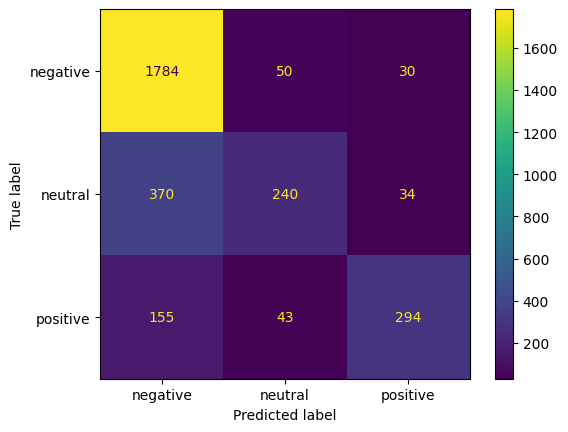

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, classifier.predict(X_test))
ConfusionMatrixDisplay(cm, display_labels=classifier.classes_).plot()

## Save and load model 
https://scikit-learn.org/stable/model_persistence.html

In [12]:
from joblib import dump, load


# save to file
dump(classifier, 'classifier.joblib')
     
# load from file
clf = load('classifier.joblib')

In [13]:
# check predictions for original and saved model 
classifier.predict_proba(X_test) == clf.predict_proba(X_test)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       ...,
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

## Dash
https://dash.plotly.com/  

Dash apps from Jupyter environments:   
https://medium.com/plotly/introducing-jupyterdash-811f1f57c02e


### Some inspirations:
Dash gallery:  
https://dash.gallery/Portal/  
Graph gallery:  
https://www.python-graph-gallery.com/

## Data preparation 

We will create 2 visualizations:  
1) number of tweets by day   
2) word cloud  
Data used in visualizations will be filtered by sentiment

In [14]:
from collections import Counter

# add tokenized column to df
df['tokenized'] = df['text'].apply(lambda x: tokenize(x))

# add date column 
df['date'] = pd.DatetimeIndex(df['tweet_created']).date

def word_counter(data):
    cnt = Counter()
    for tokenized in data:
        cnt += Counter(tokenized)
    return cnt

## Data filtering

In [15]:
# options for our dropdown menu 
sentiments = ['all'] + list(df['airline_sentiment'].unique()) 

def fillter_by_sentiment(data, sentiment):
    if sentiment == 'all':
        return data
    return data[data['airline_sentiment'] == sentiment]

## Dashboard app 

In [16]:
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px

# if building Dash app in script app.py use dash instead of jupyter_dash
# app = dash.Dash(__name__)

# Dash app build in notebook: 
app = JupyterDash(__name__)

## App layout
Some basic HTML knowledge would be nice:  
https://www.w3schools.com/html/html_intro.asp

In [17]:
app.layout = html.Div([
    html.H1("Sentiment Analysis Dashboard"), 
    html.Label([
        "Sentiment type",
        dcc.Dropdown(
            id='sentiments', clearable=False,
            value='all', options=[
                {'label': x, 'value': x}
                for x in sentiments
            ])
    ]),
    html.Div(children=[
        dcc.Graph(id="graph", style={'display': 'inline-block'}),
        html.Img(id="wordcloud", style={'display': 'inline-block'})
    ])
])

### Callbacks
call it by id :)  
What and when should change

In [18]:
# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input('sentiments', 'value')]
)
def update_figure(sentiment):
    filltered_df = fillter_by_sentiment(df, sentiment)
    # https://plotly.com/python/histograms/
    return px.histogram(
        filltered_df, x="date", color="airline_sentiment"
    )

In [19]:
import base64
from io import BytesIO

from wordcloud import WordCloud

# callback to update word cloud
@app.callback(
    Output('wordcloud', 'src'),
    [Input('sentiments', 'value')]
)
def update_wordcloud(sentiment):
    filltered_df = fillter_by_sentiment(df, sentiment)
    img = BytesIO()
    wc = WordCloud(background_color='white', width=480, height=360)
    wc.generate_from_frequencies(word_counter(filltered_df['tokenized']))
    wc.to_image().save(img, format='PNG')
    return 'data:image/png;base64,{}'.format(base64.b64encode(img.getvalue()).decode())

## Run app

In [20]:
# Run app and display result inline in the notebook
# app.run_server(mode='inline')

# Run app in new window 
app.run_server(mode='external')

Dash app running on http://127.0.0.1:8050/


![dashboard](imgs/app.png)